# Assignment Dataset - diabetes.csv

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torch.nn.functional as F
import torchvision.transforms as T
import torchvision.datasets

In [67]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [68]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [70]:
df.shape

(768, 9)

In [97]:
labels = df.Outcome.values
data = df.drop("Outcome", axis=1).values

In [98]:
labels = torch.tensor(labels[:, None]).float()

In [99]:
sc = StandardScaler()
data = sc.fit_transform(data)
data = torch.tensor(data).float()

In [100]:
data[0]

tensor([ 0.6399,  0.8483,  0.1496,  0.9073, -0.6929,  0.2040,  0.4685,  1.4260])

In [101]:
labels[0]

tensor([1.])

In [102]:
class CreateDatset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [103]:
dataset = CreateDatset(data, labels)

In [104]:
train_loader = DataLoader(dataset, batch_size=32,
                         shuffle=True,
                         drop_last=True)

## Creating Deep learning model

In [154]:
def getModel():
    
    class CreateModel(nn.Module):
        def __init__(self):
            super().__init__()
            # Input layer
            self.input_layer = nn.Linear(8, 5)
            # Hidden layers
            self.fc1 = nn.Linear(5, 4)
            self.fc2 = nn.Linear(4, 3)
            # output layer
            self.output_layer = nn.Linear(3, 1)
        
        # forward pass
        def forward(self, x):
            x = torch.tanh(self.input_layer(x))
            x = torch.tanh(self.fc1(x))
            x = torch.tanh(self.fc2(x))
            return torch.sigmoid(self.output_layer(x))
    
    model = CreateModel()
    Loss = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01,
                               momentum=0.9)
    
    return model, Loss, optimizer

In [155]:
# testing
model, Loss, optimizer = getModel()
x, y = next(iter(train_loader))
yh = model(x)
yh.shape

torch.Size([32, 1])

In [156]:
def train_model(epochs=500):
    train_acc = []
    train_loss = []
    model, Loss, optimizer = getModel()
    for i in range(epochs):
        batch_acc = []
        batch_loss = []
        for x, y in train_loader:
            # forward pass
            yh = model(x)
            loss = Loss(yh, y)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # computing loss
            batch_loss.append(loss.item())
            correct = ((yh > .5) == y).float()
            batch_acc.append(100 * torch.mean(correct))
        train_acc.append(np.mean(batch_acc))
        train_loss.append(np.mean(batch_loss))
        print(f"Epoch {i + 1}, Train accuracy: {train_acc[-1]}, Train loss: {train_loss[-1]}")
    return model, train_acc, train_loss

In [157]:
model, train_acc, train_loss = train_model()

Epoch 1, Train accuracy: 41.53645706176758, Train loss: 0.7447517092029253
Epoch 2, Train accuracy: 64.71353912353516, Train loss: 0.6409914344549179
Epoch 3, Train accuracy: 65.10416412353516, Train loss: 0.6160381659865379
Epoch 4, Train accuracy: 65.75521087646484, Train loss: 0.5870308987796307
Epoch 5, Train accuracy: 73.56771087646484, Train loss: 0.5472856052219868
Epoch 6, Train accuracy: 76.82291412353516, Train loss: 0.511194517215093
Epoch 7, Train accuracy: 77.99478912353516, Train loss: 0.489924846837918
Epoch 8, Train accuracy: 78.515625, Train loss: 0.4801592193543911
Epoch 9, Train accuracy: 78.64583587646484, Train loss: 0.475424957772096
Epoch 10, Train accuracy: 78.64583587646484, Train loss: 0.475011944770813
Epoch 11, Train accuracy: 77.734375, Train loss: 0.4712453931570053
Epoch 12, Train accuracy: 77.734375, Train loss: 0.4693725220859051
Epoch 13, Train accuracy: 78.515625, Train loss: 0.47029390186071396
Epoch 14, Train accuracy: 78.25521087646484, Train loss:

Epoch 117, Train accuracy: 79.03646087646484, Train loss: 0.4235686461130778
Epoch 118, Train accuracy: 79.81771087646484, Train loss: 0.42203059047460556
Epoch 119, Train accuracy: 79.03646087646484, Train loss: 0.4245110383878152
Epoch 120, Train accuracy: 79.16666412353516, Train loss: 0.4214847218245268
Epoch 121, Train accuracy: 79.55728912353516, Train loss: 0.42230287690957385
Epoch 122, Train accuracy: 79.42708587646484, Train loss: 0.42320158580938977
Epoch 123, Train accuracy: 79.81771087646484, Train loss: 0.41806285579999286
Epoch 124, Train accuracy: 79.94791412353516, Train loss: 0.41926125809550285
Epoch 125, Train accuracy: 79.42708587646484, Train loss: 0.42018427203098935
Epoch 126, Train accuracy: 80.33853912353516, Train loss: 0.4161499999463558
Epoch 127, Train accuracy: 79.03646087646484, Train loss: 0.4171557817608118
Epoch 128, Train accuracy: 79.94791412353516, Train loss: 0.4171445102741321
Epoch 129, Train accuracy: 80.20833587646484, Train loss: 0.4186117214

Epoch 232, Train accuracy: 81.38021087646484, Train loss: 0.3857146774729093
Epoch 233, Train accuracy: 80.859375, Train loss: 0.3859813945988814
Epoch 234, Train accuracy: 80.859375, Train loss: 0.389392226934433
Epoch 235, Train accuracy: 80.98958587646484, Train loss: 0.38604573470850784
Epoch 236, Train accuracy: 82.03125, Train loss: 0.38494637173910934
Epoch 237, Train accuracy: 81.51041412353516, Train loss: 0.38626234605908394
Epoch 238, Train accuracy: 81.11978912353516, Train loss: 0.3859175518155098
Epoch 239, Train accuracy: 81.51041412353516, Train loss: 0.3879563311735789
Epoch 240, Train accuracy: 81.38021087646484, Train loss: 0.39066181766490143
Epoch 241, Train accuracy: 82.16146087646484, Train loss: 0.38368514118095237
Epoch 242, Train accuracy: 81.38021087646484, Train loss: 0.3908739673594634
Epoch 243, Train accuracy: 81.77083587646484, Train loss: 0.38442482985556126
Epoch 244, Train accuracy: 81.90103912353516, Train loss: 0.3860403895378113
Epoch 245, Train ac

Epoch 348, Train accuracy: 82.29166412353516, Train loss: 0.3693442326039076
Epoch 349, Train accuracy: 82.421875, Train loss: 0.371814822157224
Epoch 350, Train accuracy: 82.03125, Train loss: 0.3697852312276761
Epoch 351, Train accuracy: 82.8125, Train loss: 0.36805744282901287
Epoch 352, Train accuracy: 82.68228912353516, Train loss: 0.3704562485218048
Epoch 353, Train accuracy: 81.51041412353516, Train loss: 0.36972217075526714
Epoch 354, Train accuracy: 82.16146087646484, Train loss: 0.3691319953650236
Epoch 355, Train accuracy: 82.55208587646484, Train loss: 0.36812108879288036
Epoch 356, Train accuracy: 82.16146087646484, Train loss: 0.37003239306310814
Epoch 357, Train accuracy: 82.421875, Train loss: 0.3722820660720269
Epoch 358, Train accuracy: 82.421875, Train loss: 0.3681845211734374
Epoch 359, Train accuracy: 82.55208587646484, Train loss: 0.3713924214243889
Epoch 360, Train accuracy: 81.90103912353516, Train loss: 0.3706153631210327
Epoch 361, Train accuracy: 83.072914123

Epoch 460, Train accuracy: 83.984375, Train loss: 0.3576049966116746
Epoch 461, Train accuracy: 83.203125, Train loss: 0.35611375359197456
Epoch 462, Train accuracy: 83.46353912353516, Train loss: 0.3556362458815177
Epoch 463, Train accuracy: 82.421875, Train loss: 0.35571262302498025
Epoch 464, Train accuracy: 83.07291412353516, Train loss: 0.35629225087662536
Epoch 465, Train accuracy: 83.59375, Train loss: 0.35687492849926156
Epoch 466, Train accuracy: 82.55208587646484, Train loss: 0.3575345054268837
Epoch 467, Train accuracy: 82.16146087646484, Train loss: 0.35499837808310986
Epoch 468, Train accuracy: 82.421875, Train loss: 0.35807634393374127
Epoch 469, Train accuracy: 83.72396087646484, Train loss: 0.3539566646019618
Epoch 470, Train accuracy: 82.94271087646484, Train loss: 0.3561584949493408
Epoch 471, Train accuracy: 83.07291412353516, Train loss: 0.3557966308047374
Epoch 472, Train accuracy: 82.421875, Train loss: 0.3573154757420222
Epoch 473, Train accuracy: 83.203125, Trai

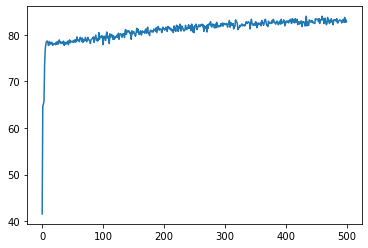

In [158]:
plt.plot(train_acc);

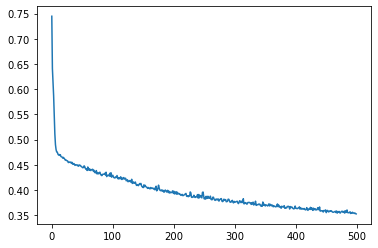

In [159]:
plt.plot(train_loss);